<a href="https://colab.research.google.com/github/ducpb/dog-cat-kaggle/blob/master/test_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import os, cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [0]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=60,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    shear_range=0.2,
    zoom_range=0.2
)
val_datagen = ImageDataGenerator(rescale=1./255)

In [4]:
batch_size = 20
height, width = (150,150)

train_generator = train_datagen.flow_from_directory(
        './drive/My Drive/Colab Notebooks/data/train',
        target_size=(height, width),
        batch_size=batch_size,
        class_mode='categorical')

validation_generator = val_datagen.flow_from_directory(
        './drive/My Drive/Colab Notebooks/data/validation',
        target_size=(height, width),
        batch_size=batch_size,
        class_mode='categorical')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [0]:
from tensorflow.keras.applications.vgg16 import VGG16

In [0]:
pre_trained_model = VGG16(input_shape=(150,150,3), include_top=False, weights=None)
pre_trained_model.load_weights('./drive/My Drive/Colab Notebooks/model_trained/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5')

In [7]:
pre_trained_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [8]:
for layer in pre_trained_model.layers:
  layer.trainable = False

last_layer = pre_trained_model.get_layer('block5_pool')
last_output = last_layer.output
print(last_output.shape)

(None, 4, 4, 512)


In [9]:
x = layers.Flatten()(last_output)
x = layers.Dense(1028, activation='relu')(x)
x = layers.Dropout(0.4)(x)
x = layers.Dense(1028, activation='relu')(x)
x = layers.Dropout(0.4)(x)
x = layers.Dense(2, activation='softmax')(x)
model = Model(pre_trained_model.input, x)
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [0]:
model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.0001), metrics=['acc'])

In [11]:
H =model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=100,
      validation_data=validation_generator,
      validation_steps=50,
      verbose=2)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/100
100/100 - 29s - loss: 0.6624 - acc: 0.6565 - val_loss: 0.3540 - val_acc: 0.8490
Epoch 2/100
100/100 - 29s - loss: 0.5180 - acc: 0.7405 - val_loss: 0.3785 - val_acc: 0.8250
Epoch 3/100
100/100 - 29s - loss: 0.4443 - acc: 0.7930 - val_loss: 0.3077 - val_acc: 0.8640
Epoch 4/100
100/100 - 29s - loss: 0.4216 - acc: 0.8010 - val_loss: 0.3132 - val_acc: 0.8690
Epoch 5/100
100/100 - 30s - loss: 0.4262 - acc: 0.8090 - val_loss: 0.3103 - val_acc: 0.8670
Epoch 6/100
100/100 - 30s - loss: 0.4295 - acc: 0.7970 - val_loss: 0.2841 - val_acc: 0.8820
Epoch 7/100
100/100 - 30s - loss: 0.3800 - acc: 0.8285 - val_loss: 0.2917 - val_acc: 0.8660
Epoch 8/100
100/100 - 30s - loss: 0.3769 - acc: 0.8300 - val_loss: 0.2565 - val_acc: 0.8820
Epoch 9/100
100/100 - 30s - loss: 0.3675 - acc: 0.8315 - val_loss: 0.3774 - val_acc: 0.8360
Epoch 10/100
100/100 - 30s - loss: 0.3623 - acc: 0.8365 - val_loss: 0.2812 - val_acc: 0.8750
Epo

Text(0.5, 1.0, 'Training and validation loss')

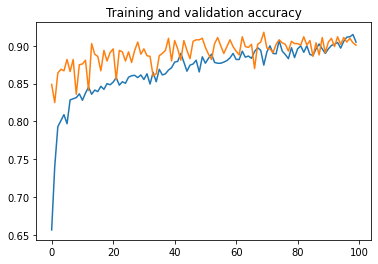

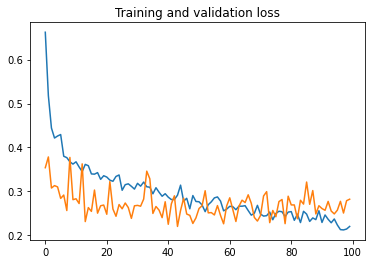

In [12]:
acc = H.history['acc']
val_acc = H.history['val_acc']
loss = H.history['loss']
val_loss = H.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.title('Training and validation loss')